In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")

In [5]:
df.sample(10)

,Age,EstimatedSalary,Purchased
120,36,75000,0
302,37,137000,1
185,31,66000,0
23,45,22000,1
213,35,58000,0
281,35,61000,0
180,26,16000,0
273,39,106000,1
158,26,30000,0
322,41,52000,0


### train test splitter

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size = 0.3,
                                                    random_state = 0)

In [7]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

### StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### mean of initial data

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
X_train_scaled #its a numpy array

In [15]:
#converting numpy array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [16]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [18]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [19]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### efect of scaling

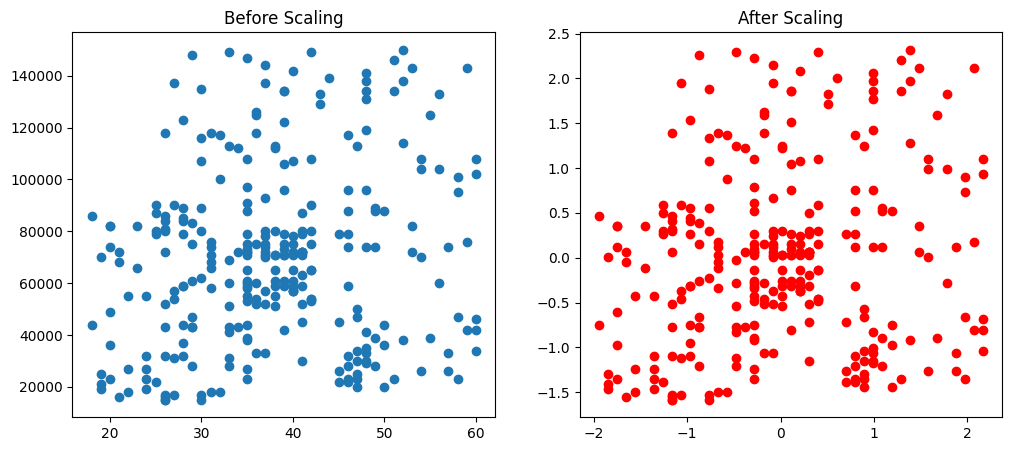

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
plt.show()

In [31]:
#custom_function
def custom_standard_scaler(X_train):

    #mean of each feature
    mean = X_train.mean()
    #standard deviation of each feature
    std = X_train.std()
    #standardize the data
    scaled_X_train = (X_train-mean)/std
    return scaled_X_train

#using custom standard scaler function to scale the data
scaled_X_train = custom_standard_scaler(X_train)

In [32]:
np.round(scaled_X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


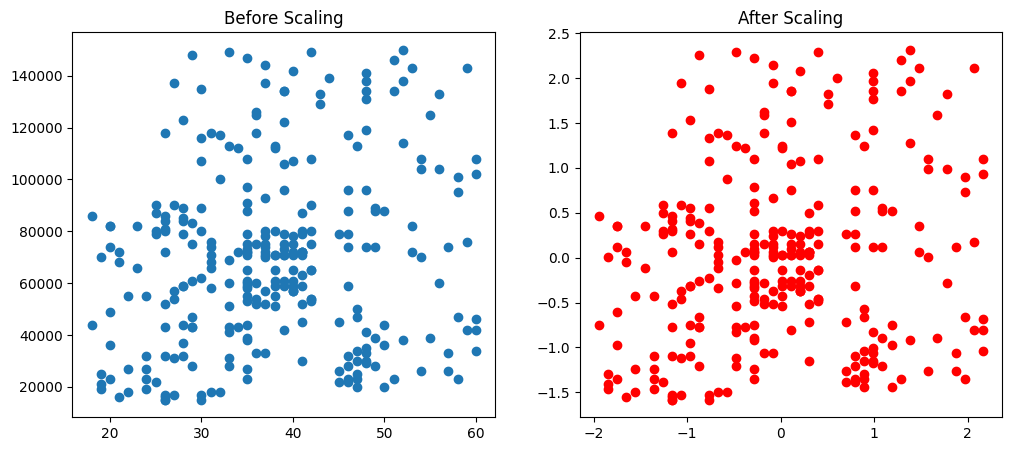

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(scaled_X_train['Age'], scaled_X_train['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')
plt.show()